### SetUp

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Collection

In [420]:
data=pd.read_csv('Bengaluru_House_Data.csv')
print(data.shape)
data.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Data Cleaning

In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [422]:
data.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


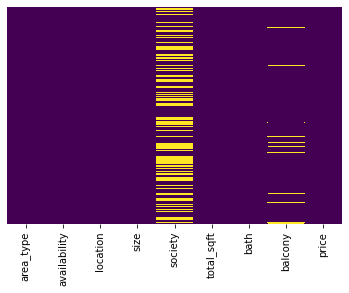

In [423]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

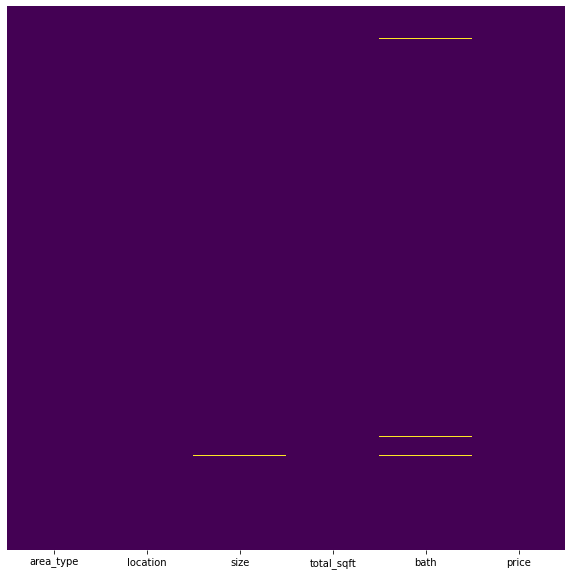

In [424]:
## we can remove society as we have so much null values to it and remove balcony as well bz it doesn't have good correlation to price.
data.drop(['balcony','society','availability'],axis='columns',inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [425]:
# still have missing value which is not clearly visible in heat map
data.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [426]:
data.dropna(inplace=True)
print(data.shape)
data.isnull().sum()
# no missing values now

(13246, 6)


area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [427]:
# total square_feet is not float type (categorical type), do convert it to float
# size is not properly cleaned let clean it as well

def convert_sqft_to_num(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

print(data['size'].unique())
print(data['total_sqft'].unique())

data['bhk']=data['size'].apply(lambda x: int(x.split(' ')[0]))
data['total_sqft']=data['total_sqft'].apply(convert_sqft_to_num)

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [428]:
data.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Outlier Removal

In [429]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']
print(data.shape)
data.head()

(13246, 8)


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [430]:
len(data['location'].unique())

1304

In [431]:
# it has about 1300 unique location which is very high
data.location = data.location.apply(lambda x: x.strip()) # to remove leading and ending extra spaces
location_stats=data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [432]:
# location stats is a series 
len(location_stats[location_stats<=10])

1052

In [433]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [434]:
data.location=data.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(data['location'].unique())

242

In [435]:
data=data[~(data.total_sqft/data.bhk<300)]
data.shape

(12502, 8)

In [436]:
def remove_pps_outlier(df): 
    df_out=pd.DataFrame()
    threshold=1
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-threshold*st)) & (subdf.price_per_sqft<=(m+threshold*st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

data=remove_pps_outlier(data)
print(data.shape)
data.head()

(10241, 8)


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In a particular location the price of 2bhk house should be smaller than 3bhk then 4 bhk and so on....

In [437]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')

data=remove_bhk_outlier(data)
print(data.shape)
data.head()

(7329, 8)


,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


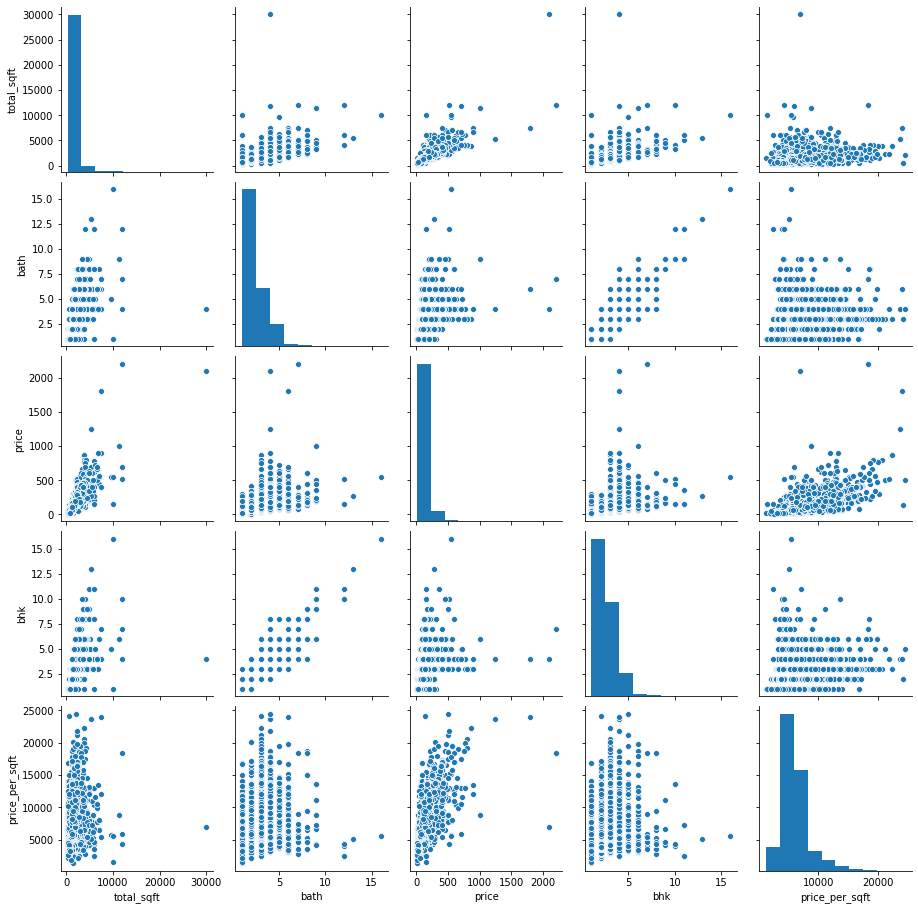

In [438]:
sns.pairplot(data)
## outlier point in plot

Text(0, 0.5, 'count')

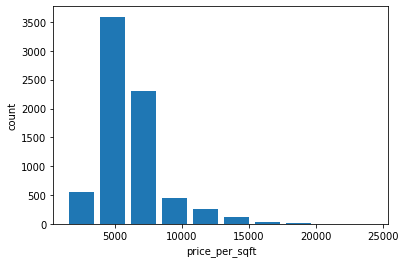

In [439]:
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel('count')

In [440]:
data=data[data.bhk<data.bath+2]
print(data.shape)

(7295, 8)


In [441]:
data.drop('size',axis='columns',inplace=True)
data.head()

/home/sachin/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


### categorical encodeing

In [442]:
len(data['location'].unique())

242

In [443]:
len(data['area_type'].unique())

4

In [444]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#area_type_encode = le.fit_transform(data['area_type'])d
data['location_label']=le.fit_transform(data['location'])
data['area_type_label']=le.fit_transform(data['area_type'])
data.head()

/home/sachin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/sachin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,location_label,area_type_label
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,0,3
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,0,3


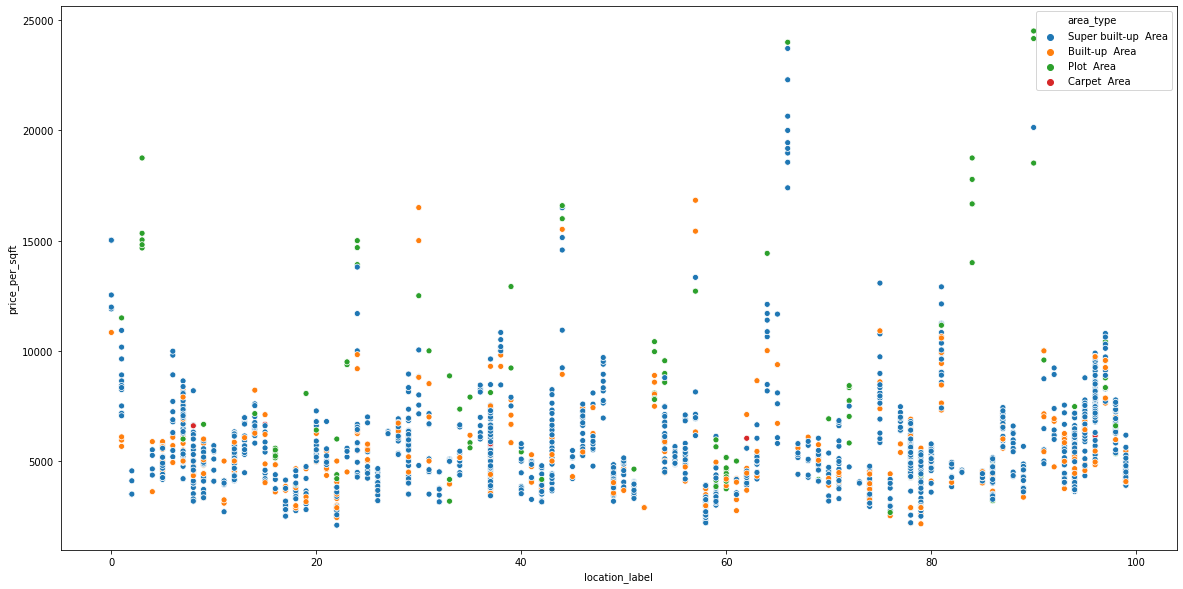

In [445]:
plt.figure(figsize=(20,10))
dummy_df=data[data.location_label<100]
sns.scatterplot(x='location_label',y='price_per_sqft',data=dummy_df,hue=data['area_type'])

In [446]:
# in above scatter plot we can conclude that area_type is correlated to price_per_sqft for particular location so, we will also include it..
location_dummies=pd.get_dummies(data.location)
location_dummies.drop('other',inplace=True,axis=1)
area_type_dummies=pd.get_dummies(data.area_type)
area_type_dummies.drop('Carpet  Area',inplace=True,axis=1)
location_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [447]:
X=pd.concat([data[['total_sqft','bath','bhk']],location_dummies,area_type_dummies],axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [448]:
y=data['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## Data Preparation

In [460]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=50)
print(X_train.shape)
print(X_test.shape)

(6565, 247)
(730, 247)


In [461]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train,y_train)
reg.predict(X_test)
score=reg.score(X_test,y_test)
print(score)

0.841659716389435


In [462]:
print(reg.intercept_)

0.8330584749552798


In [463]:
# we use k fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.1,random_state=50)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84165972, 0.87137253, 0.83283097, 0.88254662, 0.90107956])

In [2]:
import pickle
with open('House_prediction_model','wb') as f:
    pickle.dump(reg,f)

NameError: name 'reg' is not defined